# Визуализация данных

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bikes = pd.read_pickle('Data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [32]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
bikes_sum

week
1      39441
2      30871
3      42193
4      23079
5      28415
6      33259
7      32139
8      50136
9      52958
10     77316
11     90547
12     79109
13    118031
14     97000
15     98468
16    142918
17    141147
18    146127
19    136607
20    142346
21    189749
22    210326
23    211869
24    220392
25    213553
26    146455
27    183652
28    154848
29    172636
30    163447
31    135086
32    147911
33    166679
34    152282
35    138529
36    191800
37    186208
38    103925
39    124820
40     99622
41    159527
42    185695
43    141509
44    123557
45     66682
46    142787
47    103454
48    107727
49     48680
50     40147
51     31938
52     34460
Name: Rental Count, dtype: int64

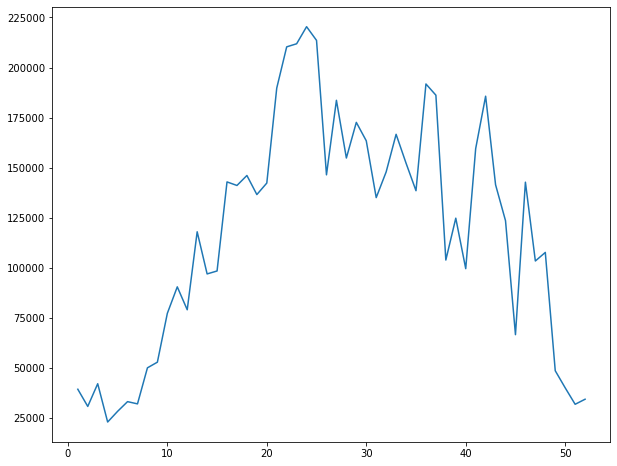

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(bikes_sum)

In [61]:
bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

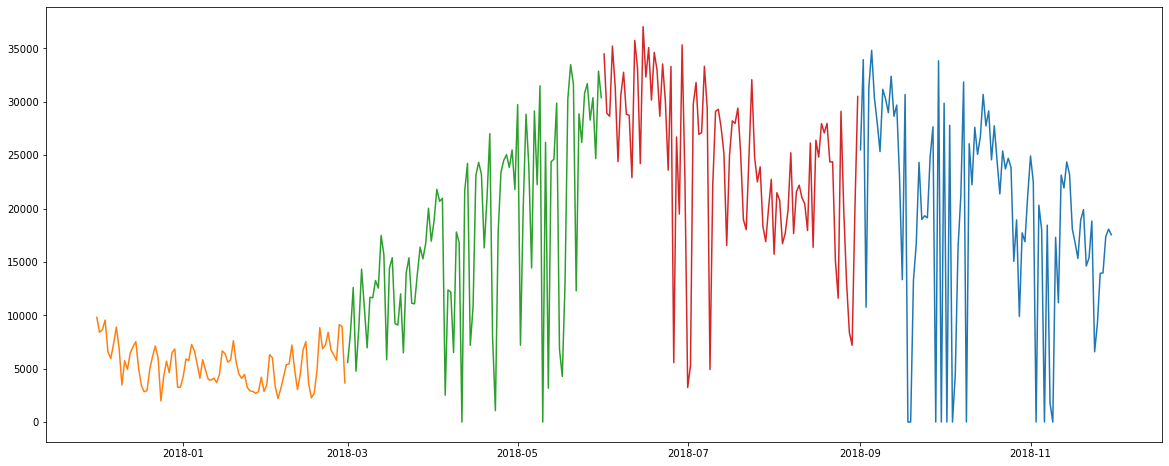

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Autumn'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Winter'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Spring'])
ax.plot(bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum().loc['Summer'])

In [73]:
bikes['Temperature'].describe()

count    8760.000000
mean       12.877814
std        11.939144
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature, dtype: float64

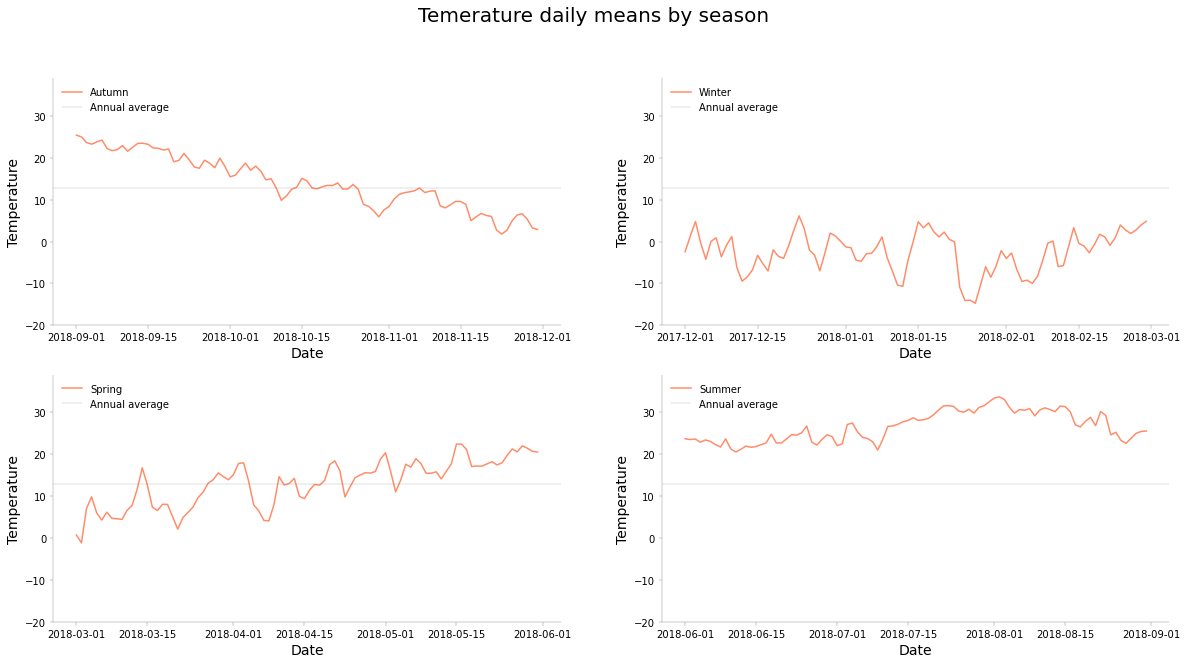

In [117]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Autumn'], c='#ff8c69')
ax[0][1].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Winter'], c='#ff8c69')
ax[1][0].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Spring'], c='#ff8c69')
ax[1][1].plot(bikes.groupby(['Seasons', 'Date'])['Temperature'].mean().loc['Summer'], c='#ff8c69')

for axis,season in zip(ax.ravel(), ['Autumn', 'Winter', 'Spring', 'Summer']):
    axis.set_xlabel('Date', fontsize=14)
    axis.set_ylabel('Temperature', fontsize=14)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.xaxis.set_tick_params(width=0.2)
    axis.yaxis.set_tick_params(width=0.2)
    axis.set_ylim(-20, 39)
    axis.axhline(12.9, c='grey', lw=0.25)
    axis.legend([season, 'Annual average'], frameon=False, loc=2)
    for spine in ['bottom','left']:
        axis.spines[spine].set_linewidth(0.2)
        
fig.suptitle('Temerature daily means by season', fontsize=20)
fig.savefig('temps.pdf')
fig.savefig('temps.png', dpi=100)

In [140]:
month_weather = bikes.groupby(bikes['Date'].dt.month)['Rental Count'].mean()
month_weather

Date
1      196.416667
2      230.830357
3      507.259409
4      722.427778
5      956.123656
6     1223.694444
7      968.470430
8      857.962366
9      925.265278
10     863.185484
11     640.972222
12     244.724462
Name: Rental Count, dtype: float64

<BarContainer object of 12 artists>

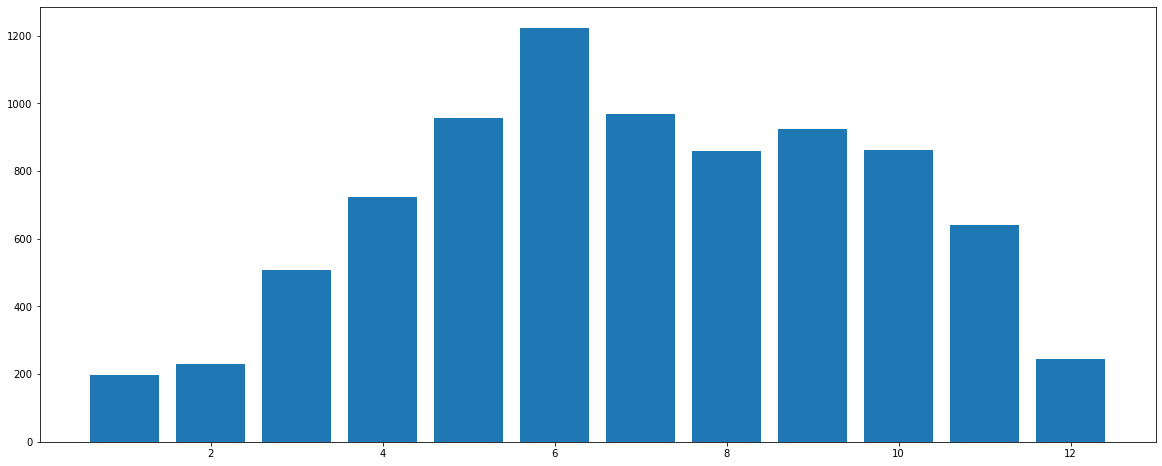

In [141]:
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(month_weather.index, month_weather)

In [142]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [143]:
gapminder.shape

(1704, 6)

In [144]:
gapminder.year.values  # смотрим, какие значения есть в колонке год

array([1952, 1957, 1962, ..., 1997, 2002, 2007])

Сделаем колонку continent категориальной, потому что категории закодировать по строкам не получится

In [145]:
gapminder['continent'] = pd.Categorical(gapminder['continent'])

In [146]:
gapminder['continent'].cat.codes.head()  # теперь у нас есть такая числовая разметка категорий, которую мы сможем скормить переменной графика

0    2
1    2
2    2
3    2
4    2
dtype: int8

Еще мы хотим логарифмировать переменную gpd. Многие переменные, связанные, например, с доходом имеют логарифмическое распределение (что логично - у нас очень много людей или стран с каким-то небольшим достатком и есть очень длинный хвост наблюдений с большими значениями по шкале).


(array([1.365e+03, 2.150e+02, 9.600e+01, 1.900e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([   241.1658765 ,  11569.36257885,  22897.5592812 ,  34225.75598355,
         45553.9526859 ,  56882.14938825,  68210.3460906 ,  79538.54279295,
         90866.7394953 , 102194.93619765, 113523.1329    ]),
 <BarContainer object of 10 artists>)

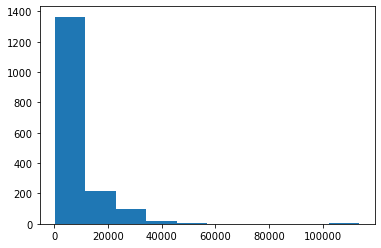

In [147]:
plt.hist(gapminder['gdpPercap'])

C логарифмированием шкалы мы избавимся от длинного хвоста (ниже посмотрим, как это влияент на график.)
Насчет логарифмированных шкал нужно волноваться в статистических моделях, потому что от этого у вас поменяется интерпретация коэффицентов. Сейчас нам достаточно понимать, что у стран, находящихся правее по шкале - ВВП на душу населения выше.

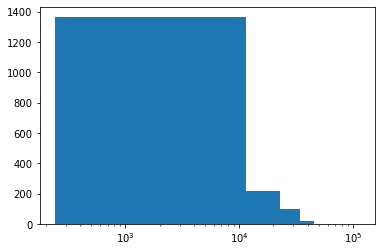

In [148]:
plt.hist(gapminder['gdpPercap'])
plt.xscale('log')


## Упражнение
Сейчас в наборе данных у нас есть каждая страна в каждый год с 1952 по 2007.
Давайте сделаем срез для 1952 года и попробуем построить график рассения (почти то же самое, что делали выше):

* x - доход
* y - продолжительность жизни
* размер - население
* цвет - континент

Подпишем шкалы x и y.


**Пример без лог-преобразования шкалы x**

(0.0, 100000.0)

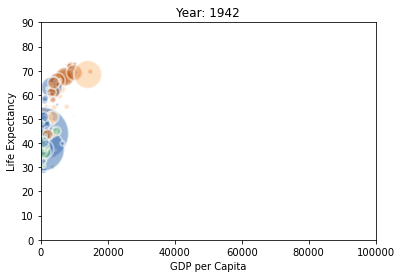

In [149]:
tmp = gapminder[gapminder.year == 1952 ]
plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000 , 
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5, 
            edgecolors="white", linewidth=2) # добавили два новых аргумента - цвет и обводка границ точек.
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1942) )  # заголовок графика
plt.ylim(0, 90)  # давайте еще добавим лимиты шкал, чтобы шкала не менялась, когда мы будем строить графики для других годов
plt.xlim(0,100000) 

**То же самое, но с лог-преобразованием**

(100.0, 100000.0)

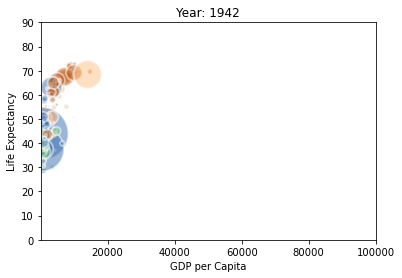

In [150]:
tmp = gapminder[gapminder.year == 1952 ]
plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000 , 
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5, edgecolors="white", linewidth=2)  
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1942) ) 
plt.ylim(0, 90)
plt.xlim(100,100000) # меняем лимиты для лог-шкалы

А теперь давайте автоматизируем эту красоту, чтобы получить график для каждой пятилетки с 1952 до 2007. Потом при желании мы можем их собрать в gif в какой-нибудь программе и получить анимированный график.

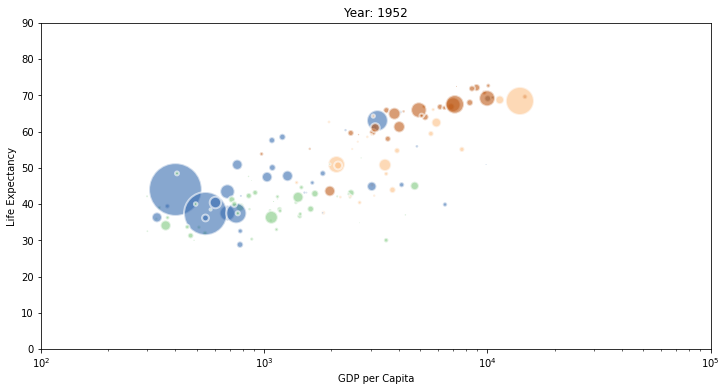

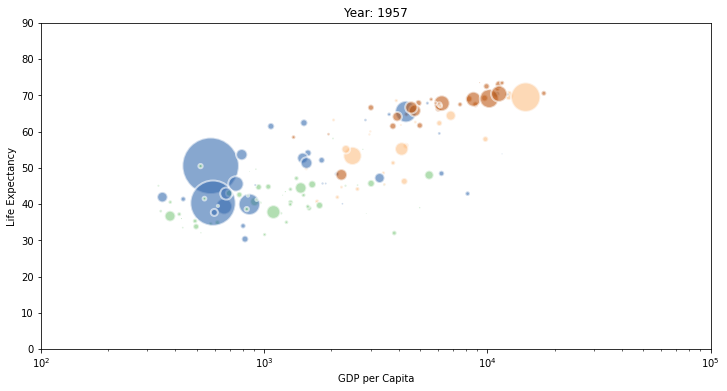

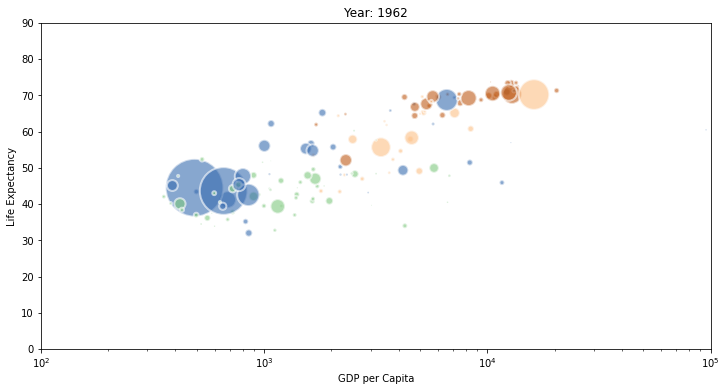

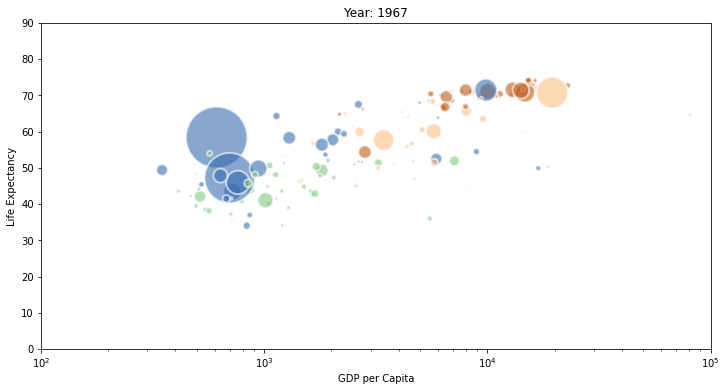

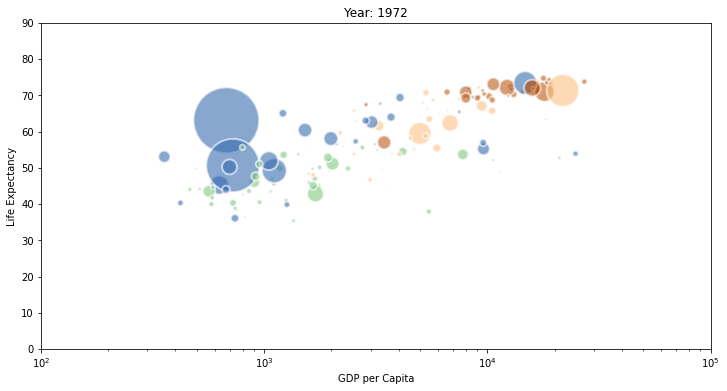

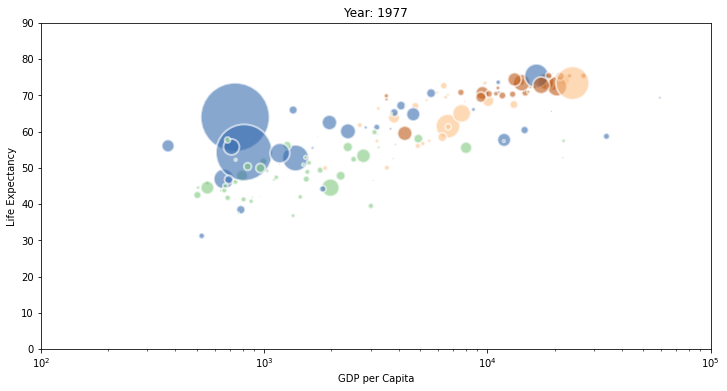

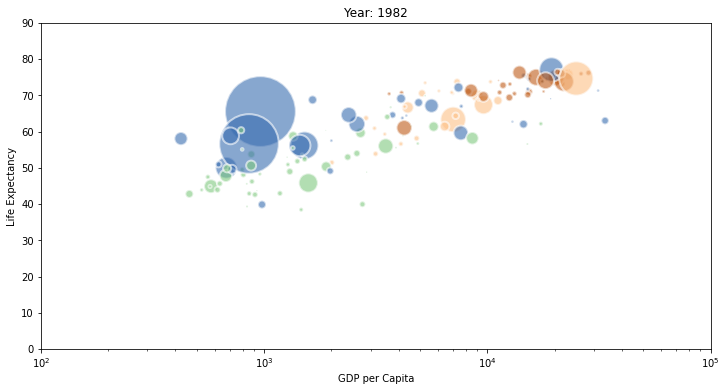

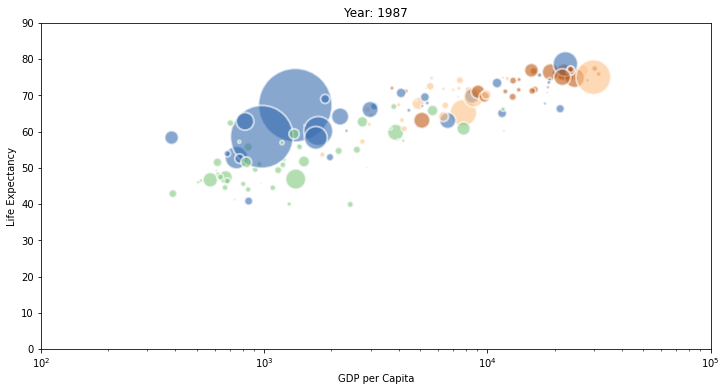

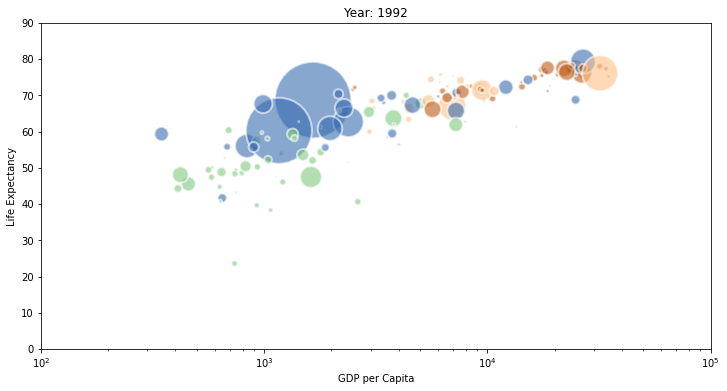

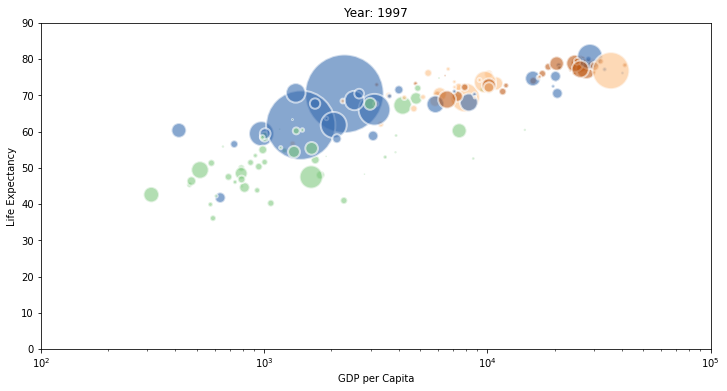

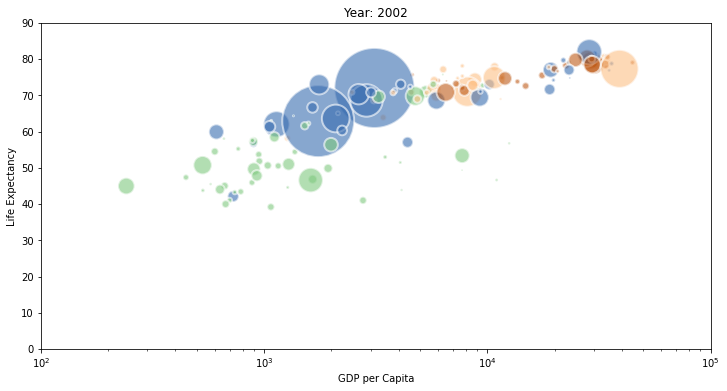

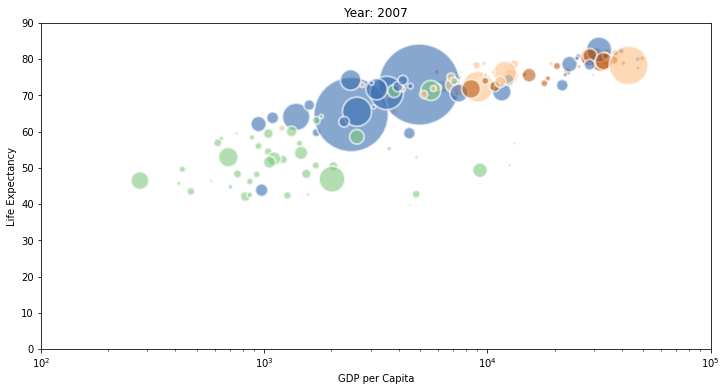

In [151]:
for i in gapminder.year.unique(): # пишем цикл, который проходит по всем уникальным значениям в колонке год
 
    # создаем фигуру
    fig = plt.figure(figsize=(12, 6))

    tmp = gapminder[gapminder.year == i]  # создаем срез датафрейма для года на данной итерации
    plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s=tmp['pop']/200000 , 
                c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    plt.xscale('log')
    plt.xlabel("GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: "+str(i) )
    plt.ylim(0, 90)
    plt.xlim(100,100000)
    
       
    # Сохраняем каждый график под уникальным именем.
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
